In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from utils import *

c:\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Imbalance Measures


In [20]:
def HL(p, q):
    """Hellinger distance between two discrete distributions"""

    z = np.sqrt(p) - np.sqrt(q)
    return np.sqrt(z @ z / 2)

In [89]:
def TV(p, q):
  """ Total Variation between two discrete distribution"""
  p = np.array(p)
  q = np.array(q)
  
  z = (p-q).sum()
  return 0.5*(np.abs(z))

In [22]:
def KL(a, b):
    """ KullBack divergence between two discrete distribution"""

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

In [123]:
def farest_distrib(p):
  """ Return the List farest distribution from p estimator // the farthest in the direction of imbalance with the name number of class than p
  p : list/array - input distribution 
  
  Exemple : farest_distrib([7,8,2]) -> [1,1,8]
  """
  
  k = len(p)
  M = np.max(p) 
  
 
  return np.concatenate((np.ones(k-1), np.ones(1)*M))
  
 
  
  
  
  
  

In [96]:
farest_distrib([3,3,3])

array([1., 1., 3.])

In [97]:
def balanced_distrib(p):
  """ Return the List balanced distribution with same number of class than p
  p : List/Array - input distribution
  
  Exemple : balanced_distrib([7,8,2]) -> [8,8,8]
  """
  
  return np.ones(len(p))*max(p)

In [93]:
balanced_distrib([3,3,3])

array([3., 3., 3.])

In [126]:
def imbalance(dst, p):
  """ Return the imbalanced measure of p with the distance function dst
  dst : String - 'HL' / 'TV' / 'KL'
  p : List/Array - input distribution
  """
  
  if dst == 'HL':
    fct = HL
  elif dst == 'TV':
    fct = TV 
  else:
    fct = KL
    
  e = balanced_distrib(p)
  
  fd = farest_distrib(p)
 
  
  
  return fct(e,p)/fct(e,fd)
  
  
  

## Imbalance measure evolution

In [127]:



init_distrib_test = [1,11,1,1,1]
distrib_test = init_distrib_test.copy()

sorted = np.argsort(init_distrib_test)

mTV = list()
mHL = list()
mKL = list()

total_add_nb = 0
for x in init_distrib_test:
  total_add_nb += max(init_distrib_test) - x
  
for i in range(total_add_nb+1):
  
  mTV.append(imbalance('TV',distrib_test ))
  mHL.append(imbalance('HL',distrib_test ))
  mKL.append(imbalance('KL',distrib_test ))
  
  distrib_test[np.argmin(distrib_test)] += 1
  
  
  


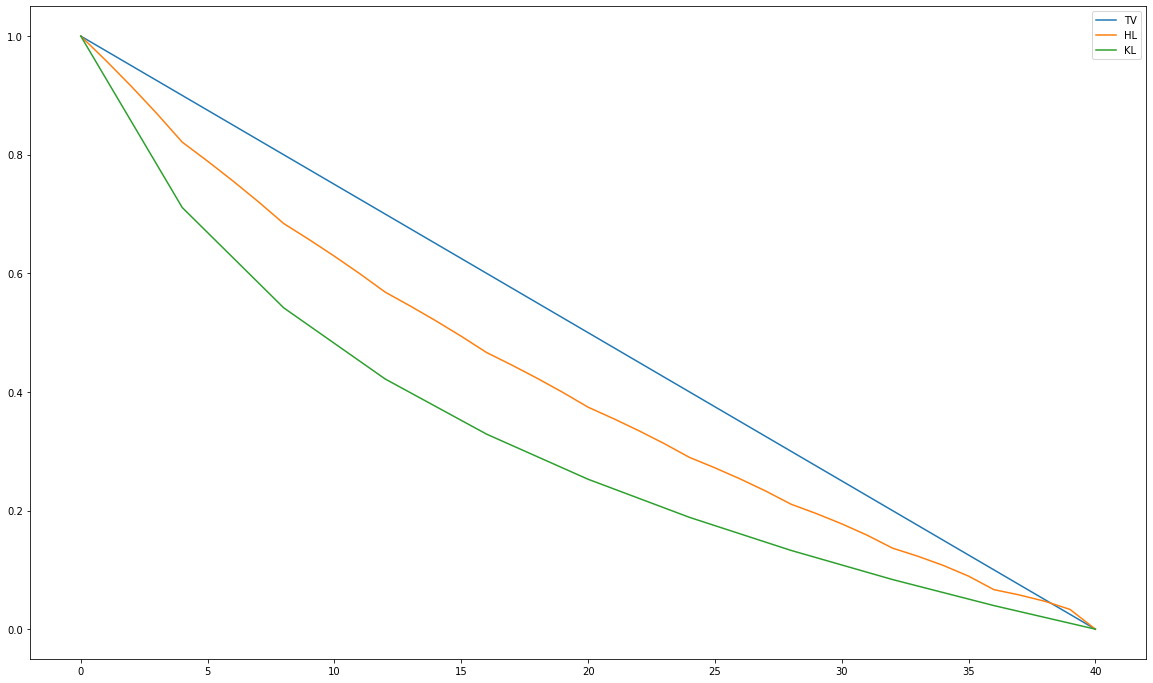

In [128]:
plt.figure(figsize=(20,12))
plt.plot(mTV, label = 'TV')
plt.plot(mHL, label = 'HL')
plt.plot(mKL, label = 'KL')

plt.legend()


# Imbalance measure of each dataset

In [145]:
imbal = list()
for dataset in os.listdir('data'):
  _,_,y_train,_ = get_data(dataset, '\t')
  _, dist = np.unique(y_train, return_counts=True)
  k = nb_classes(dataset)
  imbal.append([dataset, imbalance('TV',dist ),imbalance('HL',dist ),imbalance('KL',dist ), dist, dist.sum()])
  
imbal = pd.DataFrame(imbal)

imbal = imbal.rename(columns={0 : 'Dataset', 1 : 'TV', 2: 'HL', 3 : 'KL',4 : 'y_train distribution', 5 : 'Number of data in train set'})
  
  
  
  

<ipython-input-126-ad12a6672f45>:20: RuntimeWarning: invalid value encountered in double_scalars
  return fct(e,p)/fct(e,fd)


## Save to csv

In [147]:
imbal.to_csv('Imbalanced_Measure_Dataset.csv')

## Sorting by most unbalanced

In [148]:
imbal.sort_values(by=['TV'], ascending=False).head(30)

,Dataset,TV,HL,KL,y_train distribution,Number of data in train set
70,MedicalImages,0.907041,0.763236,0.476898,"[35, 15, 25, 16, 10, 7, 18, 6, 46, 203]",381
122,Wafer,0.893570,0.695392,0.327814,"[97, 903]",1000
124,WordSynonyms,0.870763,0.754841,0.532021,"[6, 60, 5, 35, 5, 17, 4, 24, 6, 12, 6, 8, 3, 1...",267
39,FiftyWords,0.860344,0.755043,0.541736,"[52, 49, 33, 20, 13, 15, 16, 11, 11, 10, 10, 1...",450
24,DistalPhalanxTW,0.828302,0.651591,0.350985,"[29, 28, 82, 30, 18, 213]",400
83,Phoneme,0.826087,0.764597,0.606835,"[4, 5, 24, 3, 1, 3, 5, 1, 8, 1, 7, 7, 4, 4, 3,...",214
30,ECG5000,0.824742,0.771325,0.510446,"[292, 177, 10, 19, 2]",500
28,Earthquakes,0.783270,0.566124,0.271793,"[264, 58]",322
93,ProximalPhalanxTW,0.759777,0.621285,0.331659,"[16, 109, 58, 20, 17, 180]",400
22,DistalPhalanxOutlineAgeGroup,0.724609,0.557724,0.267573,"[30, 113, 257]",400
